In [1]:
import logging

import pandas as pd
import matplotlib.pyplot as plt

from rowing.world_rowing import api, livetracker, utils, dashboard, cli

logging.basicConfig(level=logging.INFO)
logging.getLogger().setLevel(logging.INFO)

INFO:world_rowing.api:loaded most recent competition: 2022 World Rowing Cup I
INFO:world_rowing.dashboard:loading Women's Pair Repechage 1, starting at 2022-05-28 09:35:00+01:00


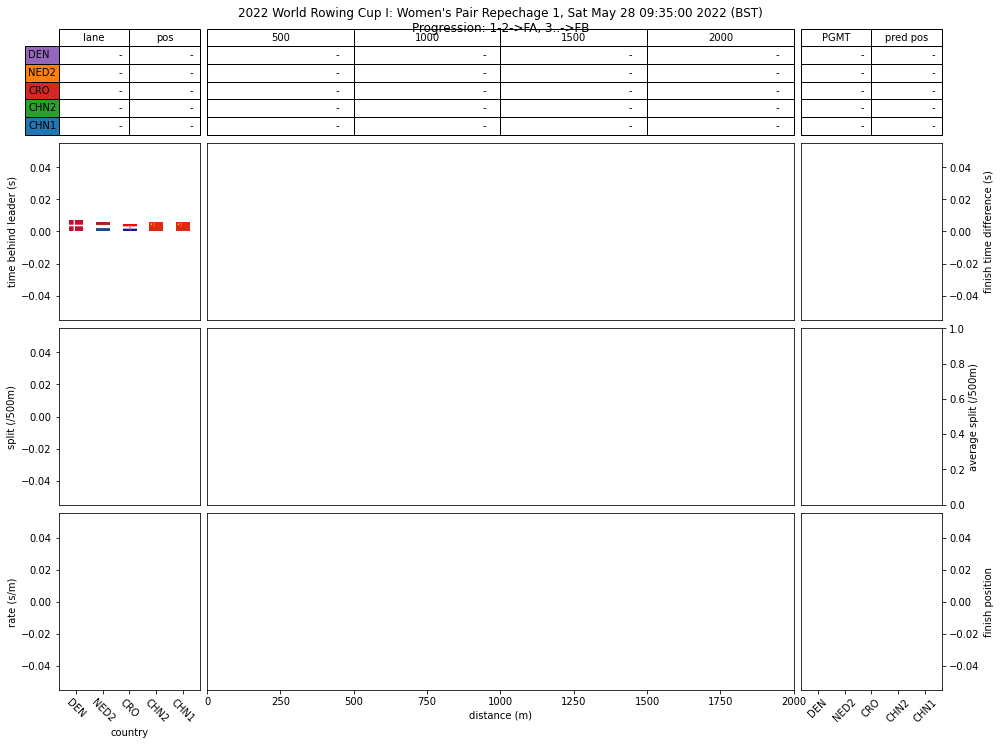

INFO:world_rowing.dashboard:time elapsed                  3:28.01                             \
Country                           DEN     NED2               CRO   
currentPosition                     2        3                 1   
distanceTravelled                 953      974               965   
distanceFromLeader                 21        0                 9   
strokeRate                         34       36                36   
metrePerSecond                    4.4      4.5               4.5   
GMT                           3:14.13  3:18.40           3:16.57   
PGMT                            93.3%    95.4%             94.5%   
timeFromLeader      4.731295513272244      0.0  1.98181818181817   

time elapsed                                              
Country                          CHN2               CHN1  
currentPosition                     4                  5  
distanceTravelled                 941                931  
distanceFromLeader                 33                 4

In [2]:
dashboard.Dashboard.load_notebook_dashboard(figsize=(14, 10))

# Live tracking

Running the cell below will automatically update the graph with the livetracking data and predictions for the end of the race. 

INFO:world_rowing.api:loaded last race started: Men's Eight Final FA
INFO:world_rowing.dashboard:loading Men's Eight Final FA, starting at 2021-07-30 02:25:00+01:00


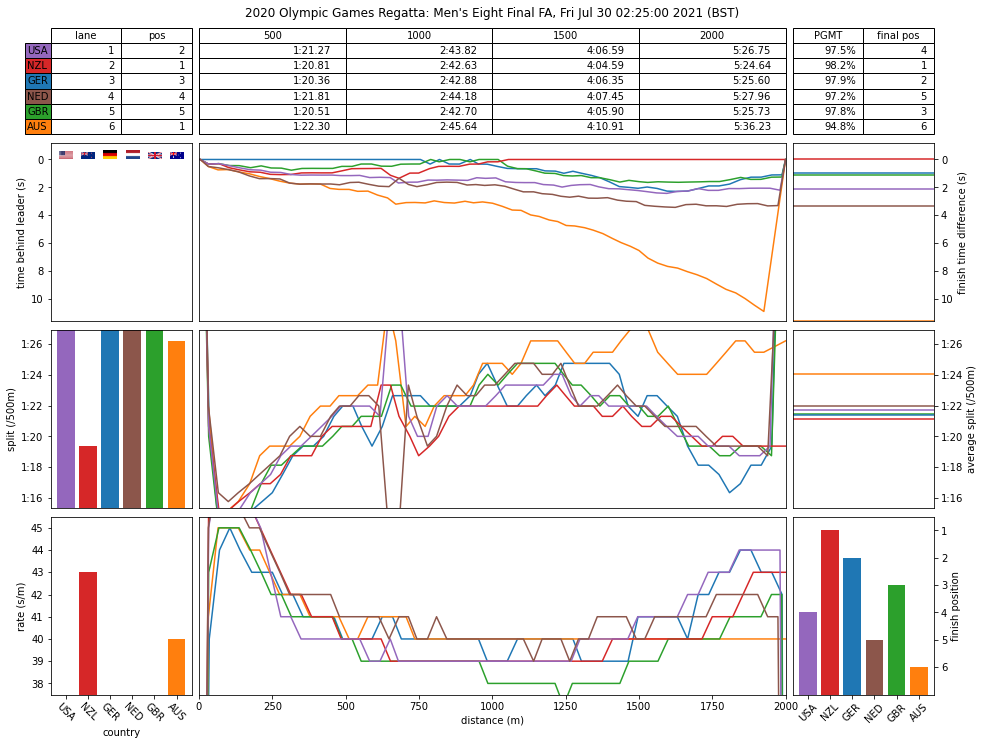

In [3]:
competition = api.get_competitions(2021).loc["e807bba5-6475-4f1a-9434-26704585bf19"]
dash = dashboard.Dashboard.load_last_race(competition=competition, figsize=(14, 10))
dash.update()

# Viewing livetracking data for previous races

You can view the livetracking data for previous races as well

In [3]:
races = api.get_competition_races(competition.name)
races.iloc[:10].DisplayName

id
820c8656-ce52-47ea-ba55-7234b354c7b1             Lightweight Women's Double Sculls Heat 1
bcdd5cae-1772-44da-a9a7-b8bd3786f8e7             Lightweight Women's Double Sculls Heat 2
8b324308-d581-4405-a91f-0db23b535910            Lightweight Women's Double Sculls Heat H3
f73c8215-2427-459f-959d-2dc252a02215        Lightweight Women's Double Sculls Repechage 1
842a3024-7ea3-4156-b5a4-99145e06ef18        Lightweight Women's Double Sculls Repechage 2
8c51cb1f-e33f-45fb-af26-6bfbc86d1605    Lightweight Women's Double Sculls Semifinal A/B 1
982a7e03-cd4a-4ba0-a8f7-6ecb31ff30d5    Lightweight Women's Double Sculls Semifinal A/B 2
6f99d474-34d7-4f6c-ba84-b1bab962472c            Lightweight Women's Double Sculls Final B
169414b8-d18f-4350-930a-bfac0531bddb            Lightweight Women's Double Sculls Final A
af877ca3-960e-49a5-a8fb-b20d70941a8c            Lightweight Women's Double Sculls Final C
Name: DisplayName, dtype: object

INFO:world_rowing.dashboard:loading Lightweight Women's Double Sculls Final A, starting at 2021-07-29 02:10:00+01:00


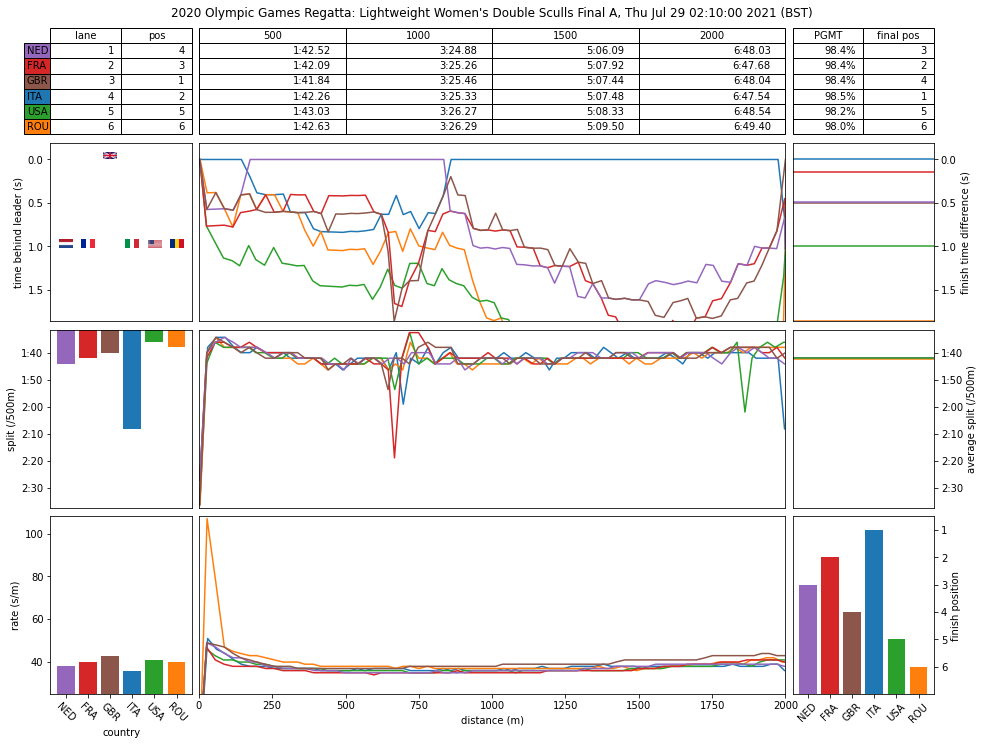

In [4]:
race = races.iloc[8]
dash = dashboard.Dashboard.from_race_id(
    race.name, figsize=(14, 10))
dash.update()

# Viewing competition PGMTs

Unfortunately doesn't work for the Olympics

In [5]:
comp_pgmts = api.get_competition_pgmts(competition.name)
group_boat_pgmts = comp_pgmts.groupby('Boat')
boat_pgmts = group_boat_pgmts\
    .first()\
    .sort_values('PGMT', ascending=False)
boat_pgmts

,PGMT,Time,WBT,Country,Rank,Lane,Date
Boat,,,,,,,
LM2x,1.000000,6:05.33,6:05.33,IRL,1,3,2021-07-28 02:30:00
LW2x,1.000000,6:41.36,6:41.36,ITA,1,4,2021-07-28 02:50:00
M4x,1.000000,5:32.03,5:32.03,NED,1,4,2021-07-28 01:30:00
W2-,1.000000,6:47.41,6:47.41,NZL,1,4,2021-07-28 03:30:00
W4x,1.000000,6:05.13,6:05.13,CHN,1,3,2021-07-28 01:50:00
W8+,1.000000,5:52.99,5:52.99,ROU,1,4,2021-07-28 03:40:00
M2x,0.998307,6:00.33,5:59.72,FRA,1,3,2021-07-28 00:30:00
W4-,0.997309,6:15.37,6:14.36,AUS,1,3,2021-07-28 00:50:00
W2x,0.990724,6:41.03,6:37.31,ROU,1,4,2021-07-28 00:18:00


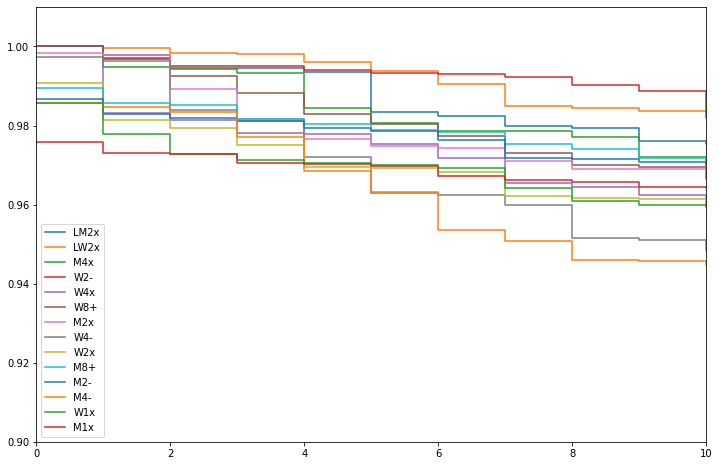

In [6]:
f, ax = plt.subplots(figsize=(12, 8))

for boat in boat_pgmts.index:
    pgmt = group_boat_pgmts.get_group(boat).PGMT.sort_values(ascending=False)
    ax.step(range(pgmt.size), pgmt.values, label=boat, where='post')
    
ax.set_xlim(0, 10)
ax.set_ylim(0.9, comp_pgmts.PGMT.max() + .01)
ax.legend();

In [4]:
races = api.get_last_races(n=10, fisa=True)

INFO:world_rowing.api:loaded most recent competition: 2022 World Rowing Cup I


In [10]:
competition = api.get_most_recent_competition(True)
competition_id = competition.name

INFO:world_rowing.api:loaded most recent competition: 2022 World Rowing Cup I


In [17]:
races = api.get_worldrowing_records(
    "race",
    cached=True,
    filter=(("event.competitionId", competition_id),),
    include=('event.competition', 'raceStatus'),
    sort=(("eventId", "asc"), ("Date", "asc")),
)
races


ValueError: dictionary update sequence element #0 has length 17; 2 is required

In [12]:
races

,eventId,racePhaseId,raceStatusId,genderId,RscCode,DisplayName,RaceNr,IsStarted,Date,DateString,Progression,Rescheduled,RescheduledFrom
id,,,,,,,,,,,,,
208c14df-226a-40f7-8ea5-af126bb69752,01566d2a-333d-49f7-8dc2-2965489d7e07,cd3d5ca1-5aed-4146-b39b-a192ae6533f1,182f6f15-8e78-41c3-95b3-8b006af2c6a1,5beae5a3-10e4-4d33-96e5-c1a9f612dd54,ROWMNOCOX4------------HEAT000100--,Men's Four Heat 1,21,None,2022-05-27 09:15:00,2022-05-27 11:15:00+02:00,"1-3->SA/B, 4..->R",NaN,None
aaf5f06f-aeaf-4b27-8204-1e2fa314749b,01566d2a-333d-49f7-8dc2-2965489d7e07,cd3d5ca1-5aed-4146-b39b-a192ae6533f1,182f6f15-8e78-41c3-95b3-8b006af2c6a1,5beae5a3-10e4-4d33-96e5-c1a9f612dd54,ROWMNOCOX4------------HEAT000200--,Men's Four Heat 2,22,None,2022-05-27 09:20:00,2022-05-27 11:20:00+02:00,"1-3->SA/B, 4..->R",NaN,None
ed5d416c-e4f9-4477-8bf5-8381650213b7,01566d2a-333d-49f7-8dc2-2965489d7e07,cd3d5ca1-5aed-4146-b39b-a192ae6533f1,182f6f15-8e78-41c3-95b3-8b006af2c6a1,5beae5a3-10e4-4d33-96e5-c1a9f612dd54,ROWMNOCOX4------------HEAT000300--,Men's Four Heat 3,23,None,2022-05-27 09:25:00,2022-05-27 11:25:00+02:00,"1-3->SA/B, 4..->R",NaN,None
ca4c1d78-3604-4dc3-b9c3-14f1eda2d7d2,01566d2a-333d-49f7-8dc2-2965489d7e07,0959f5e8-f85a-40fb-93ab-b6c477f6aade,f89cc288-076b-4bb6-9776-96e66820e1b8,5beae5a3-10e4-4d33-96e5-c1a9f612dd54,ROWMNOCOX4------------REP-000100--,Men's Four Repechage,51,None,2022-05-27 13:35:00,2022-05-27 15:35:00+02:00,,NaN,None
3d134a4a-4d41-4ffe-85b3-6389a3f38a30,01566d2a-333d-49f7-8dc2-2965489d7e07,e0fc3320-cd66-43af-a5b5-97afd55b2971,f89cc288-076b-4bb6-9776-96e66820e1b8,5beae5a3-10e4-4d33-96e5-c1a9f612dd54,ROWMNOCOX4------------FNL-000300--,Men's Four Final C,67,None,2022-05-28 07:30:00,2022-05-28 09:30:00+02:00,,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822e4eeb-29bc-49ea-a366-8a4c1d692a94,e2b6dcf5-3e52-49a0-a30a-bb8ba99281bf,e6693585-d2cf-464c-9f8e-b2e531b26400,f89cc288-076b-4bb6-9776-96e66820e1b8,5beae5a3-10e4-4d33-96e5-c1a9f612dd54,ROWMNOCOX2------------SFNL000200--,Men's Pair Semifinal A/B 2,74,None,2022-05-28 08:11:00,2022-05-28 10:11:00+02:00,,NaN,None
117de15f-c6f3-4a22-9db2-82b534a9a598,e2b6dcf5-3e52-49a0-a30a-bb8ba99281bf,e0fc3320-cd66-43af-a5b5-97afd55b2971,f89cc288-076b-4bb6-9776-96e66820e1b8,5beae5a3-10e4-4d33-96e5-c1a9f612dd54,ROWMNOCOX2------------FNL-000200--,Men's Pair Final B,95,None,2022-05-29 07:35:00,2022-05-29 09:35:00+02:00,,NaN,None
f7d9cbe2-c76e-48f9-a3bc-cf52a5082727,e2b6dcf5-3e52-49a0-a30a-bb8ba99281bf,e0fc3320-cd66-43af-a5b5-97afd55b2971,f89cc288-076b-4bb6-9776-96e66820e1b8,5beae5a3-10e4-4d33-96e5-c1a9f612dd54,ROWMNOCOX2------------FNL-000100--,Men's Pair Final A,107,None,2022-05-29 09:23:00,2022-05-29 11:23:00+02:00,,NaN,None


INFO:world_rowing.api:loaded most recent competition: 2022 World Rowing Cup I
INFO:world_rowing.api:loaded last race started: Lightweight Men's Double Sculls Heat 2
INFO:world_rowing.dashboard:loading Lightweight Men's Double Sculls Heat 2, starting at 2022-05-27 11:35:00+01:00


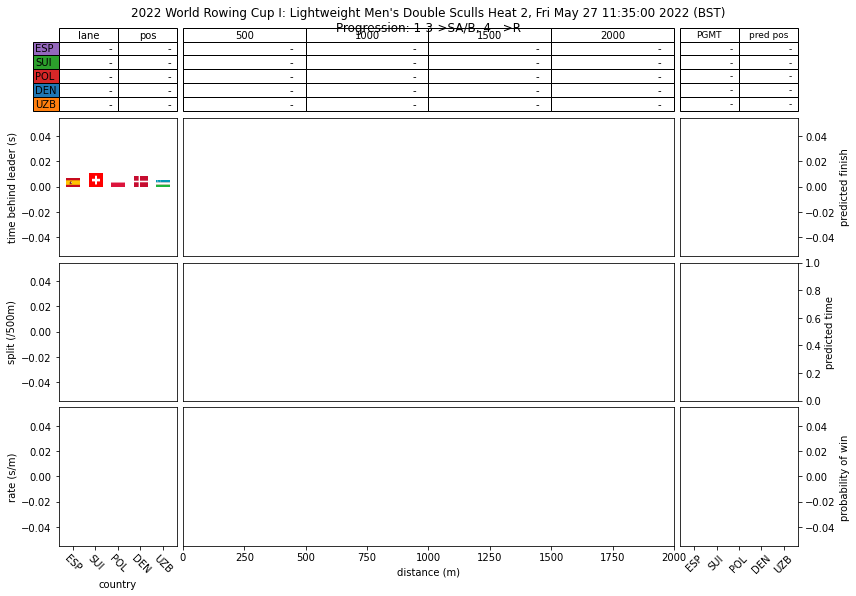

In [3]:
data = api.get_worldrowing_data(
    'livetracker', dash.race_tracker.race_id
)
    

In [30]:
data['live']

[{'id': '5e08ef81-cae0-4891-abd1-f417bbc3ccf0',
  'raceId': 'fedccbb0-9330-4a23-bc9b-ed54b6c430ba',
  'trackCount': 1,
  'distanceOfLeader': 0,
  'distanceOfLeaderFromFinish': 2000,
  'raceBoatTrackers': [{'id': '923683d1-8c43-488a-aea3-1f72fb301f8d',
    'raceTrackerId': '5e08ef81-cae0-4891-abd1-f417bbc3ccf0',
    'raceBoatId': '22c9e10a-50ce-48ea-acb9-10384b7c788a',
    'startPosition': 1,
    'currentPosition': 2,
    'distanceTravelled': 0,
    'distanceFromLeader': 0,
    'strokeRate': 0,
    'metrePerSecond': 0,
    'kilometrePersSecond': None},
   {'id': '660528d0-ef09-4234-9238-9529d65280e1',
    'raceTrackerId': '5e08ef81-cae0-4891-abd1-f417bbc3ccf0',
    'raceBoatId': 'ddb45b0e-e6eb-46f3-aa16-ca58f525690a',
    'startPosition': 2,
    'currentPosition': 3,
    'distanceTravelled': 0,
    'distanceFromLeader': 0,
    'strokeRate': 0,
    'metrePerSecond': 0,
    'kilometrePersSecond': None},
   {'id': '0fa9f20b-9415-42e7-9949-2f85900ea72c',
    'raceTrackerId': '5e08ef81-cae0-

In [31]:
live_data, intermediates = dash.race_tracker.update_livedata()

In [34]:
live_data, intermediates = dash.update_livedata(
            live_data, intermediates)

In [50]:
self = dash.race_tracker.predicter

distanceFromLeader                     strokeRate                    \
                       HUN2  NED  SLO      GBR3       HUN2   NED   SLO  GBR3   
distance                                                                       
0                       0.0  0.0  0.0  0.800000        0.0   0.0   0.0   0.0   
5                       0.0  0.0  0.0  0.666667       45.0  48.0  53.6  13.0   
10                      0.2  0.0  0.2  2.600000       45.2  48.0  51.8  39.0   
15                      1.0  0.0  1.0  3.000000       46.0  48.0  50.6  39.6   
20                      1.0  0.0  1.0  3.000000       46.0  48.0  49.0  40.0   
...                     ...  ...  ...       ...        ...   ...   ...   ...   
1980                    NaN  NaN  NaN       NaN        NaN   NaN   NaN   NaN   
1985                    NaN  NaN  NaN       NaN        NaN   NaN   NaN   NaN   
1990                    NaN  NaN  NaN       NaN        NaN   NaN   NaN   NaN   
1995                    NaN  NaN  NaN       NaN        NaN   NaN   NaN   NaN   
2000                    NaN  NaN  NaN       NaN        NaN   NaN   NaN   NaN   

         metrePerSecond        ...      PGMT                  pace  \
                   HUN2   NED  ...       SLO      GBR3        HUN2   
distance                       ...                                   
0                  3.30  3.40  ...  0.502795  0.435479  151.515152   
5                  3.84  3.96  ...  0.584668  0.564550  130.208333   
10                 4.08  4.25  ...  0.656120  0.589051  122.549020   
15                 4.48  4.50  ...  0.689964  0.640320  111.607143   
20                 4.84  4.90  ...  0.726765  0.684804  103.305785   
...                 ...   ...  ...       ...       ...         ...   
1980                NaN   NaN  ...       NaN       NaN         NaN   
1985                NaN   NaN  ...       NaN       NaN         NaN   
1990                NaN   NaN  ...       NaN       NaN         NaN   
1995                NaN   NaN  ...       NaN       NaN         NaN   
2000                NaN   NaN  ...       NaN       NaN         NaN   

                                                  time                      \
                 NED         SLO        GBR3      HUN2       NED       SLO   
distance                                                                     
0         147.058824  151.515152  143.678161  1.942838  1.942838  1.942838   
5         126.262626  129.533679  142.857143  3.316751  3.316751  3.316751   
10        117.647059  120.772947  130.890052  4.456638  4.415684  4.456638   
15        111.111111  114.678899  119.047619  5.653816  5.439546  5.653816   
20        102.040816  107.296137  109.170306  6.713183  6.510895  6.713183   
...              ...         ...         ...       ...       ...       ...   
1980             NaN         NaN         NaN       NaN       NaN       NaN   
1985             NaN         NaN         NaN       NaN       NaN       NaN   
1990             NaN         NaN         NaN       NaN       NaN       NaN   
1995             NaN         NaN         NaN       NaN       NaN       NaN   
2000             NaN         NaN         NaN       NaN       NaN       NaN   

                    
              GBR3  
distance            
0         2.172913  
5         3.465778  
10        4.948092  
15        6.082355  
20        7.117761  
...            ...  
1980           NaN  
1985           NaN  
1990           NaN  
1995           NaN  
2000           NaN  

[401 rows x 24 columns]

In [69]:

        speed = (
            live_dist_data.metrePerSecond 
            + live_dist_data.metrePerSecond.shift(-1).fillna(0)
        ) / 2
        for cnt in live_dist_data.metrePerSecond.columns:
            live_dist_data[('pace', cnt)] = 500 / speed[cnt]

In [40]:

predictions = dash.race_tracker.predict(live_data=live_data)


IndexError: positional indexers are out-of-bounds

In [39]:
dash.update_predictions(live_data=live_data)

IndexError: positional indexers are out-of-bounds

In [38]:
live_data.columns.levels[0]

Index(['currentPosition', 'distanceTravelled', 'distanceFromLeader',
       'strokeRate', 'metrePerSecond', 'time', 'GMT', 'PGMT',
       'timeFromLeader'],
      dtype='object')

In [28]:
dash.live_notebook_dashboard()


IndexError: positional indexers are out-of-bounds